In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import data 2018
dataset=pd.read_csv('mlbnew.txt')


# Split "Pos Summary" column to obtain Original Position
dataset[['OriginalPosition',
             '2ndPosition',
             '3rdPosition',
             '4thPosition',
             '5thPosition',
             '6thPosition',
             '7thPosition']] = dataset['Pos Summary'].str.split('-',expand=True)


dataset=dataset.drop(['Pos Summary'],axis=1)
# dataset=dataset.drop(dataset.index[-1])



# dataset.isnull().any()
for column in dataset.columns[14:20]:
    dataset[column].fillna(0,inplace=True)  

dataset.isnull().any()

X=dataset.iloc[:,5:21].values
y=dataset.OriginalPosition






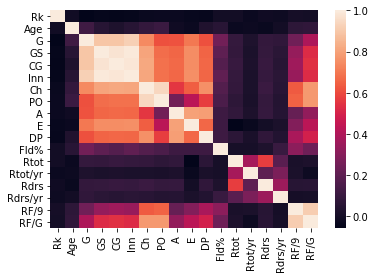

In [2]:
import seaborn as sns
Var_Corr = dataset.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

labelbinarizer_y=LabelBinarizer()
y=labelbinarizer_y.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)


sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


print(X_train)
print(y_train)

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


[[ 0.5021924  -0.72028022 -0.59505465 ...  0.06586001 -0.60709035
  -0.77190939]
 [-0.02175237 -0.72028022 -0.59505465 ...  0.06586001 -0.58335986
  -0.74997517]
 [ 0.09214867 -0.0041352  -0.03187404 ... -0.30820304  0.32235366
   0.24583827]
 ...
 [-1.06964192 -0.69790068 -0.59505465 ...  0.06586001 -1.12916102
  -0.81577782]
 [ 1.57286216  1.18197999  1.04551497 ... -0.21468728  0.40541036
   0.43447254]
 [-0.47735652 -0.72028022 -0.59505465 ...  0.06586001 -0.56358446
  -0.71926727]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
(3258, 16)
(3258, 7)
(815, 16)
(815, 7)


In [4]:
#Importing keras and classes
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop

# Initializing the ANN
classifier=Sequential()

#Initial Layer and First Hidden Layer
classifier.add(Dense(input_dim=16,kernel_initializer ='uniform',activation ='relu',units=11))

#Second Hidden Layer
classifier.add(Dense(units=11,kernel_initializer ='uniform',activation ='relu'))

#Output Layer
classifier.add(Dense(units=7,kernel_initializer ='uniform',activation ='softmax'))

#Compile ANN
classifier.compile(optimizer='Adam',
loss='categorical_crossentropy',
metrics=['accuracy'])



Using TensorFlow backend.


Train on 3258 samples, validate on 815 samples
Epoch 1/50
3258/3258 [==============================] - 2s 537us/step - loss: 1.7511 - acc: 0.6194 - val_loss: 1.2093 - val_acc: 0.7178
Epoch 2/50
3258/3258 [==============================] - 0s 136us/step - loss: 0.8576 - acc: 0.7170 - val_loss: 0.6666 - val_acc: 0.7620
Epoch 3/50
3258/3258 [==============================] - 0s 119us/step - loss: 0.6093 - acc: 0.7701 - val_loss: 0.5186 - val_acc: 0.8196
Epoch 4/50
3258/3258 [==============================] - 0s 129us/step - loss: 0.5007 - acc: 0.8207 - val_loss: 0.4528 - val_acc: 0.8466
Epoch 5/50
3258/3258 [==============================] - 0s 134us/step - loss: 0.4402 - acc: 0.8435 - val_loss: 0.4112 - val_acc: 0.8564
Epoch 6/50
3258/3258 [==============================] - 0s 119us/step - loss: 0.4015 - acc: 0.8567 - val_loss: 0.3935 - val_acc: 0.8552
Epoch 7/50
3258/3258 [==============================] - 0s 127us/step - loss: 0.3731 - acc: 0.8646 - val_loss: 0.3623 - val_acc: 0.8712
E

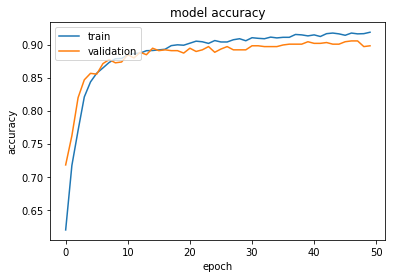

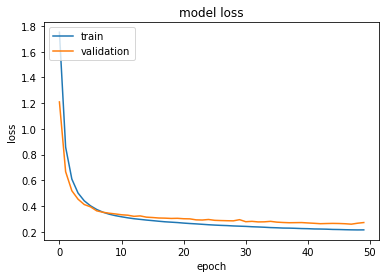

In [5]:
#Fit Training Set to ANN
history = classifier.fit(X_train,y_train,batch_size=25,epochs=50, validation_data=(X_test,y_test))

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [6]:
classifier.save("our_model")
classifier.save_weights("our_model_weights")

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

#Selecting parameters to improve and the options
parameters={'batch_size': [25,32],
            'epochs':[100,500],
            'optimizer':['adam','rmsprop']}

from sklearn.model_selection import GridSearchCV
def build_classifier(optimizer):
    classifier=Sequential()
    classifier.add(Dense(units=11,kernel_initializer ='uniform' ,activation ='relu',input_dim=16))
    classifier.add(Dense(units=11,kernel_initializer ='uniform' ,activation ='relu'))
    classifier.add(Dense(units=7,kernel_initializer ='uniform' ,activation ='sigmoid'))
    classifier.compile(optimizer=optimizer,
    loss='categorical_crossentropy',metrics=['accuracy'])
    return classifier
    
#Assign KerasClassifier    
classifier=KerasClassifier(build_fn=build_classifier)

#Setting up Grid Search
grid_search=GridSearchCV(estimator=classifier,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10)

#Fit and initiate Grid Search on our ANN
grid_search=grid_search.fit(X_train,labelbinarizer_y.inverse_transform(y_train))

#Get best parameters
best_parameters=grid_search.best_params_

#Get best accuracy
best_accuracy=grid_search.best_score_

In [7]:
print(best_parameters)
print(best_accuracy)

{'batch_size': 25, 'epochs': 500, 'optimizer': 'adam'}
0.9220380601596071


In [7]:
#Apply Test Set to ANN
y_pred=classifier.predict(X_test)
y_pred=(y_pred>.5)

#Testing a Entry from 2015 Baseball Season (Daniel Alvarez)
player=[12,10,6,81.0,17,16,1,0,1,1.0,0,-6,-1,-15,1.89,1.42]

#Transforming player entry and running through the ANN
new_entry=classifier.predict(sc_X.transform(np.array([player])))

#Inverse transforming the resulting prediction to string class
new_entry=labelbinarizer_y.inverse_transform(new_entry)
print(new_entry)

['OF']


In [9]:
print("Games played on Pitch:")
a=input()
print("Games Started:")
b=input()
print("Complete Game:")
c=input()
print("innings played in field:")
d=input()
print("defensive chances:")
e=input()
print("putouts:")
f=input()
print("Assists:")
g=input()
print("Errors Committed:")
h=input()
print("Double Plays Turned:")
i=input()
print("Field Percentage:")
j=input()
print("Total Zone Total Fielding Runs Above Average:")
k=input()
print("Total Zone Total Fielding Runs Above Average per 1200 innings:")
l=input()
print("BIS Defensive Runs saved above avg:")
m=input()
print("BIS Defensive Runs saved above avg per 1200 innings:")
n=input()
print("Range Factor per 9 innings:")
o=input()
print("Range Factor per game:")
p=input()

player1=[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p]
new_entry1=classifier.predict(sc_X.transform(np.array([player1])))
new_entry1=labelbinarizer_y.inverse_transform(new_entry1)
print("The predicted position is: ")
print(new_entry1)

Games played on Pitch:
1
Games Started:
2
Complete Game:
3
innings played in field:
4
defensive chances:
5
putouts:
6
Assists:
7
Errors Committed:
8
Double Plays Turned:
9
Field Percentage:
0
Total Zone Total Fielding Runs Above Average:
1
Total Zone Total Fielding Runs Above Average per 1200 innings:
2
BIS Defensive Runs saved above avg:
3
BIS Defensive Runs saved above avg per 1200 innings:
4
Range Factor per 9 innings:
5
Range Factor per game:
6
The predicted position is: 
['3B']


C:\Users\ajju_\Anaconda3\envs\deep learning\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
